# Worksheet 3b: Polynomial Regression
Generalization, Regularisation and all that jazz

The aim of this notebook is to review overfitting, model selection and regularisation. We'll be continuing with the olympics data from previous worksheet, and looking at regression models. Note that the lessons here apply equally to classification, however it's more convenient to visualise regression models, and they are also much simpler to fit to data.

Let's import the scientific programming packages, and ensure plots are displayed inline.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Load up the olympics marathon data, combining the olympic year and the winning time and as before extract both the olympic years and the pace of the winning runner into 2-dimensional arrays with the data points in the rows of the array (the first dimension). Finaly, we can plot them to check that they've loaded in correctly.

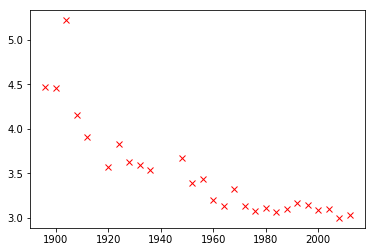

In [2]:
csv = """1896,4.47083333333333
1900,4.46472925981123
1904,5.22208333333333
1908,4.1546786744085
1912,3.90331674958541
1920,3.5695126705653
1924,3.8245447722874
1928,3.62483706600308
1932,3.59284275388079
1936,3.53880791562981
1948,3.6701030927835
1952,3.39029110874116
1956,3.43642611683849
1960,3.2058300746534
1964,3.13275664573212
1968,3.32819844373346
1972,3.13583757949204
1976,3.07895880238575
1980,3.10581822490816
1984,3.06552909112454
1988,3.09357348817
1992,3.16111703598373
1996,3.14255243512264
2000,3.08527866650867
2004,3.1026582928467
2008,2.99877552632618
2012,3.03392977050993"""


if sys.version_info[0] >= 3:
    import io # Python3
    olympics = np.genfromtxt(io.BytesIO(csv.encode()), delimiter=",")
else:
    from StringIO import StringIO  # Python2
    olympics = np.genfromtxt(StringIO(csv), delimiter=',') #Python 2
    
#print(olympics) 
x = olympics[:, 0:1]
y = olympics[:, 1:2]
plt.plot(x, y, 'rx')

**Discussion** We will consider regression models of varying complexity, from a simple linear model to polynomial models of varying order. Based on the Olympic marathon data, what order model do you think is going to perform the best? In making your decision, think about the *interpolation* predictions for years between Olympics (e.g., 2015), and *extrapolations* into the future, e.g., 2016, 2020, 2040, etc? 

## Polynomial Regression

We studied *linear regression* in the previous worksheet, which learns a linear function of the input. Now we will consider a more complex polynomial function. We can do this by augmenting our input representation. Where before we had instances of the form ]
$$\phi(\mathbf{x}) = [ 1~ x ]$$ 
now we will be using e.g., 
$$\phi(\mathbf{x}) = [ 1 ~x~ x^2~ x^3~ x^4]$$ 
for a quartic model, and correspondingly enlarged weight vector. Each element $w_i$ of the weight vector corresponds to the coefficient of the input year raised to the $i^{th}$ power. We will consider a range of polynomial models of different orders. 

To implement this we will use *basis functions* which provide a neat way of representing our data instances such that we can still use all the linear models to acheive learn a non-linear model. 

### Data Preparation

The first thing we'll do is plot the training error for the polynomial fit. To do this let's set up some parameters.

In [3]:
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = linspace(1890, 2016, num_pred_data)[:, None] # input locations for predictions
order = 4 # The polynomial order to use.
print ('Num of training samples: ',num_data)
print('Num of testing samples: ',num_pred_data)

Num of training samples:  27
Num of testing samples:  100


now let's build the *basis* matrices $\Phi$ to represent the training data, where each column is raising the input year $X$ to various powers

In [4]:
Phi = np.zeros((num_data, order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x**i
    Phi_pred[:, i:i+1] = x_pred**i

### Fitting the model

Now we can solve for the regression weights and make predictions both for the training data points, and the test data points. That involves solving the linear system given by

$$\Phi' \Phi \mathbf{w} = \Phi' \mathbf{y}$$

with respect to $\mathbf{w}$.

In [5]:
w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y)) # back to you


and using the resulting vector to make predictions at the training points and test points,

$$\mathbf{f} = \Phi \mathbf{w}$$

To implement this in practice we need to use basis matrices for both the predictions and the training points.

In [7]:
f = Phi*w
f_pred = Phi_pred*w

ValueError: operands could not be broadcast together with shapes (27,5) (5,1) 

These can be used to compute the sum of squared residuals

$$SSR(\mathbf{w}) =  \sum_{i=1}^n \left(\mathbf{y}_i - \Phi_i \mathbf{w} \right)^2 $$

In [6]:
# compute the sum of squares error
SSR = sum((y-f)**2) # over to you
print(SSR)

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

Now we have the fit and the error, let's plot the fit and the error.

In [ ]:
# print the error and plot the predictions
print("The error is: %2.4f"%SSR)
plt.plot(x_pred, f_pred)
plt.plot(x, y, 'rx')
ax = plt.gca()
ax.set_title('Predictions for Order 5')
ax.set_xlabel('year')
ax.set_ylabel('pace (min/km)')

Now use the loop structure below to compute the error for different model orders.


In [ ]:
# import the time model to allow python to pause.
# import the IPython display module to clear the output.
import time
from IPython.display import clear_output

error_list = []
max_order = 6
#fig, axes = plt.subplots(nrows=1, ncols=2)
fig1=plt.figure(figsize=(15,2*max_order))
index=1

for order in range(0, max_order+1):
    # 1. build the basis set
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = ... # paste from above
        Phi_pred[:, i:i+1] = ... # paste from above
    # 2. solve the linear system
    w = ... # paste from above

    # 3. make predictions at training and test points
    f = ... # paste from above
    f_pred = ... # paste from above
    
    # 4. compute the error and append it to a list.
    SSR = ... # paste from above
    error_list.append(SSR)
    
    # 5. plot the predictions
    fig1.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 5.5))
    if (order ==0):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    
    fig1.add_subplot(max_order+1,2,index+1)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Training Error')
    index= index+2

plt.show()
#display(fig)
print('Training error list: ',error_list)

**Discussion:** Looks like a great fit. Does that mean we can stop here, our job is done? Should take these results at face value, or are we missing something? (You might want to try an order 20 or higher model, also to see if the fits continue to improve with higher order models.)

**Discussion:** What do you think might happen if we try to fit an order 100 model to this data? Is this even a reasonable thing to try?

## Hold Out Validation

The error we computed above is the training error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data. In hold out validation, we keep back some of the training data for assessing generalization performance. In the case of time series prediction, it often makes sense to hold out the last few data points, in particular, when we are interested in *extrapolation*, i.e. predicting into the future given the past. To perform hold out validation, we first remove the hold out set. If we were interested in interpolation, we would hold out some random points. Here, because we are interested in extrapolation, we will hold out all points since 1980. 

In [ ]:
# Create a training set
x_train = x
y_train = y
indices_hold_out = np.nonzero(x>1980)
x_train = np.delete(x, indices_hold_out)[:,None]
y_train = np.delete(y, indices_hold_out)[:,None]

# Create a hold out set
x_hold_out = x[indices_hold_out][:,None]
y_hold_out = y[indices_hold_out][:,None]


print ('Whole dataset size', x.shape)
print('Train split size: ', x_train.shape)
print('Test split size: ', x_hold_out.shape)

# Now use the training set and hold out set.


Now you have the training and hold out data, you should be able to use the code above to evaluate the model on the hold out data. Do this in the code block below.

In [ ]:
error_list = []
max_order = 6
#fig, axes = plt.subplots(nrows=1, ncols=2)
fig1=plt.figure(figsize=(12,max_order*2))
index = 1
for order in range(0, max_order+1):
    # 1. build the basis set using x_train, x_hold_out
    Phi = np.zeros((x_train.shape[0], order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = ... # back to you
        Phi_hold_out[:, i:i+1] = ... # back to you
        Phi_pred[:, i:i+1] = ... # back to you
        
    # 2. solve the linear system
    w = ... # back to you

    # 3. make predictions at training and test points
    f = ... # back to you
    f_hold_out = ... # back to you
    f_pred = ... # back to you
    
    # 4. compute the error and append it to a list.
    valid_error = ... # back to you
    error_list.append(valid_error)
    
    # 5. plot the predictions
    fig1.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 5.5))
    if (order ==0):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    
    fig1.add_subplot(max_order+1,2,index+1)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Training Error')
    index= index+2

plt.show()
#display(fig)
print('Holdout error list: ', error_list)
    

**Discussion:** What is going on here? Does this match your earlier findings, or your intuition about which model order was most appropriate? Why isn't held-out error behaving the same as training error?

## Regularising the model, using ridge regression

#### This section is optional: we are unlikely to have time for it. ####
A nice way to limit model complexity is *regularisation* where model parameters are penalised from moving to silly values. Here we consider silly as high magnitude, which means the model is getting overly confident. Can you explain why this might be a problem? 

For this exercise, we'll use a 6th order model, which you might consider much too powerful for this simple problem. As a first step, we'll preprocess the features to ensure they are all operating in a similar range. E.g., $2000^6 >> 2000^1$, which means the weights for the 6th order features will take on radically different values to the 1st order features. To correct for this, and allow regularisation with a single constant, we'll z-score the columns of training Phi to have zero mean and unit standard deviation. This same transformation is also applied to the testing basis matrices.

In [ ]:
order = 6
Phi = np.zeros((x_train.shape[0], order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x_train**i
    if i > 0:
        mean = Phi[:, i:i+1].mean()
        std = Phi[:, i:i+1].std()
        print(i,mean,std)
    else: # as the first column is constant, need to avoid divide by zero 
        mean = 0
        std = 1
    
    Phi[:, i:i+1] = (Phi[:, i:i+1] - mean) / std
    Phi_hold_out[:, i:i+1] = (x_hold_out**i - mean) / std
    Phi_pred[:, i:i+1] = (x_pred**i - mean) / std
    


Next we'll perform training, trying out different values of the regularisation coefficient, lambda.

In [ ]:
error_list = []
train_error_list = []
lambdas = [1e-10, 1e-6, 1e-4, 1e-2, 1, 100] 
order = 6
#fig, axes = plt.subplots(nrows=1, ncols=3)
fig1=plt.figure(figsize=(16,order*3))
index =1
for l, lamba in enumerate(lambdas):
    # 1. build the basis set using x_train, x_hold_out
    # done above
        
    # 2. solve the linear system
    w = ... # paste from above

    # 3. make predictions at training and test points
    f = ... # paste from above
    f_hold_out = ... # paste from above
    f_pred = ... # paste from above
    
    # 4. compute the error and append it to a list.
    valid_error = ... # paste from above
    error_list.append(valid_error)
    train_error = ... # over to you
    train_error_list.append(train_error)
    
    # 5. plot the predictions
    fig1.add_subplot(len(lambdas)+1,3,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim(2.5, 5.5)
    if (l==0):
        plt.title('Pred. for Lambda ' + str(lamba))
    else: 
        plt.title(str(lamba))
        
    fig1.add_subplot(len(lambdas)+1,3,index+1)
    plt.plot(lambdas[:l+1], np.asarray(error_list))
    plt.xlim((min(lambdas), max(lambdas)))
    plt.xscale('log')
    plt.ylim(0, 12)
    if (l==0):
        plt.title('Held-out Error (validation/testing)')
    
    
    fig1.add_subplot(len(lambdas)+1,3,index+2)
    plt.plot(lambdas[:l+1], np.asarray(train_error_list))
    plt.xlim(min(lambdas), max(lambdas))
    plt.xscale('log')
    plt.ylim(0, 12)
    if (l == 0):
        plt.title('Training Error')
    index= index+3

plt.show()
#display(fig)
print('Holdout error list: ',error_list)

**Discussion:** What setting gives the best heldout performance? How does this relate to the training error, and can you describe whether you see evidence of overfitting or underfitting?